#### Adapted from: Pattern Recognition and Machine Learning, Christopher M. Bishop

The goal with variational inference is that given some data (assumed to be gaussian) we want to infer the mean and variance, which also have some underlying distribution.

In this notebook the underlying distribution of the mean and the precision (inverse of variance) is said to be:

#### $p(μ|τ) = \mathcal{N}(μ|μ_0,(λ_0τ)^−1)$

#### $p(τ) = \mathcal{N}(τ|a_0, b_0)$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Control the randomness
np.random.seed(5)

Let us generate some data with by first setting $\mu_0, \lambda_0, a_0$, and $b_0$ and then visualize the prior distribution over $\mu$ and $\tau$.

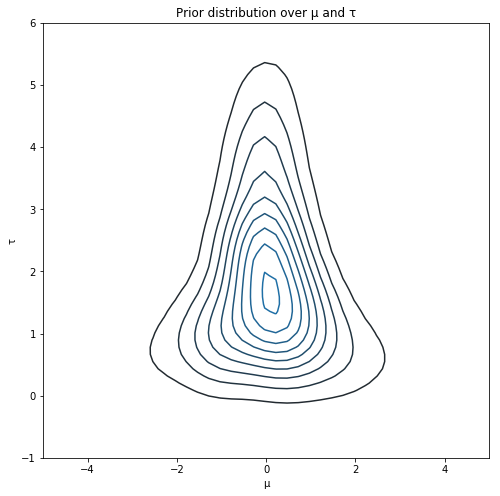

In [91]:
# Our initial parameters for mu and tau
mu0 = 0
lambda0 = 1
a0 = 2
b0 = 1
N = 500
# Lets generate some data D
prior_tau = np.random.gamma(shape=a0, scale=b0, size=N)
prior_mu = []
for i in range(N):
    prior_mu.append(np.random.normal(mu0, (lambda0 * prior_tau[i])**-1, size=1))
prior_tau = np.reshape(prior_tau, (1, len(prior_tau)))[0]
prior_mu = np.array(prior_mu).T[0]

f, ax = plt.subplots(figsize=(8, 8))
g = sns.kdeplot(prior_mu, prior_tau)
ax.set_ylim(-1, 6)
ax.set_xlim(-5, 5)
plt.title("Prior distribution over μ and τ")
plt.xlabel("μ")
plt.ylabel("τ")


D = []
for i in range(N):
    D.append(np.random.normal(prior_mu[i], 1/prior_tau[0], size=1)[0])
D = np.array(D)

Update equations for $q(\mu)$:

$\mu_N$ = $\frac{\kappa_0\mu_0 + N\bar{x}}{\kappa_0 + N}$

$\kappa_N = (\kappa_0 + N)\frac{a_N}{b_N}$

and for $q(\tau)$:

$a_N = a_0 + \frac{N + 1}{2}$

$b_N = b_0 + \kappa_0(\mathbb{E}[\mu^2] + \mu_0^2 - 2\mathbb{E}[\mu]\mu_0) + \frac{1}{1}\sum_{i=1}^N (x_i^2 + \mathbb{E}[\mu^2] - 2\mathbb{E}[\mu]x_i)$